In [1]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
import pandas as pd
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.shape


(1470, 35)

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [6]:
df['Attrition'].value_counts(normalize=True)

,proportion
Attrition,
No,0.838776
Yes,0.161224


In [7]:
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# 1. identify categorical columns and change them into numeric variabels

categorical_cols = X.select_dtypes(include='object').columns.tolist()
# set up columnTransformer with onehotencoder

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(X)


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
clf.fit(x_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [11]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

          No       0.90      0.66      0.76       247
         Yes       0.25      0.60      0.35        47

    accuracy                           0.65       294
   macro avg       0.57      0.63      0.56       294
weighted avg       0.79      0.65      0.69       294

ROC AUC Score: 0.7237488155741235


In [12]:
p_leave = clf.predict_proba(X_encoded)[:, 1] #get the probability that each employee will leave.
p_stay = 1 - p_leave
df['P_Stay'] = p_stay


In [13]:
df_stayers = df[df['P_Stay'] > 0.5]
print("Likely-to-stay employees:", df_stayers.shape)


Likely-to-stay employees: (936, 36)


In [14]:
# Step 1: Create an 'Increment' column
df['Increment'] = df['PerformanceRating'].apply(lambda x: 1.10 if x == 4 else 1.05)

# Step 2: Calculate simulated future salary
df['FutureSalary'] = df['MonthlyIncome'] * df['Increment']


In [15]:
#predict Future Salary for employees who are likely to stay — those with P_Stay > 0.5.
df_stayers = df[df['P_Stay'] > 0.5]

X_reg = df_stayers.drop(['Attrition', 'FutureSalary', 'P_Stay', 'Increment'], axis=1)
y_reg = df_stayers['FutureSalary']


In [16]:
# Reuse preprocessor and scaler
X_reg_encoded = preprocessor.transform(X_reg)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg_encoded)


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

reg = RandomForestRegressor(random_state=42)
reg.fit(X_reg_scaled, y_reg)

# Predict on same input (or split into train-test if you prefer)
y_pred = reg.predict(X_reg_scaled)


In [18]:
mse = mean_squared_error(y_reg, y_pred)
r2 = r2_score(y_reg, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 3017.309556009051
R² Score: 0.999892410778421


In [29]:
df_stayers['PredictedFutureSalary'] = y_pred


/tmp/ipython-input-29-260758989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stayers['PredictedFutureSalary'] = y_pred


In [20]:
df['P_Leave'] = 1 - df['P_Stay']


In [22]:
# Top 10 Employees Most Likely to Leave
df[['EmployeeNumber', 'MonthlyIncome', 'P_Leave']].sort_values(by='P_Leave', ascending=False).head(10)


,EmployeeNumber,MonthlyIncome,P_Leave
748,1037,4969,0.969578
525,720,4577,0.968226
695,970,10609,0.938174
915,1279,2625,0.937583
1057,1487,5765,0.933679
937,1307,17123,0.931875
798,1108,2313,0.929626
841,1173,3597,0.922882
892,1248,1859,0.921202
689,960,2973,0.918398


In [23]:
# Top 10 Employees Most Likely to Stay

df[['EmployeeNumber', 'MonthlyIncome', 'P_Stay']].sort_values(by='P_Stay', ascending=False).head(10)


,EmployeeNumber,MonthlyIncome,P_Stay
894,1250,17779,0.997749
1010,1424,14732,0.996606
233,323,19517,0.992506
408,546,16555,0.992015
1009,1423,19701,0.991097
417,558,18041,0.990930
1054,1484,10466,0.990298
187,254,18722,0.989726
25,32,19094,0.987464
379,505,16659,0.987028


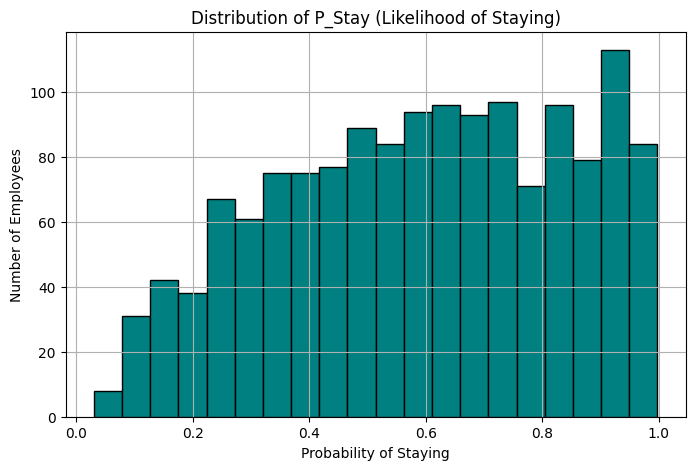

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['P_Stay'], bins=20, color='teal', edgecolor='black')
plt.title("Distribution of P_Stay (Likelihood of Staying)")
plt.xlabel("Probability of Staying")
plt.ylabel("Number of Employees")
plt.grid(True)
plt.show()


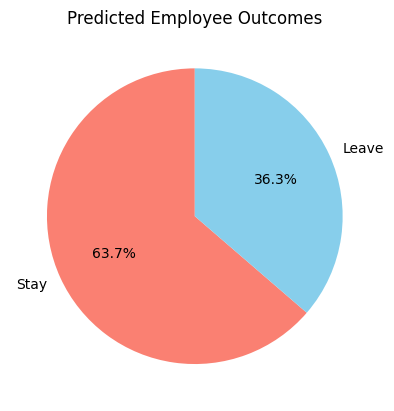

In [25]:
df['Prediction'] = df['P_Stay'].apply(lambda x: 'Stay' if x > 0.5 else 'Leave')

# Plot
df['Prediction'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['salmon', 'skyblue'])
plt.title("Predicted Employee Outcomes")
plt.ylabel('')
plt.show()
